# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [209]:
import pandas as pd
import numpy as np
from random import seed
import matplotlib.pyplot as plt

df = pd.read_csv('data\Advertising.csv', sep=',')
df.shape

(200, 5)

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [210]:
display(df.info())
display(df[df['radio'] == 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


None

,Unnamed: 0,TV,radio,newspaper,sales
127,128,80.2,0.0,9.2,8.8


In [211]:
df = df[df['radio'] != 0]

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [212]:
X = (df.drop(['Unnamed: 0', 'sales'], axis=1)).values
y = df['sales'].values

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [213]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(199, 4) (199, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [214]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [215]:
num_iters = 1000 #количество итераций
m = X.shape[0] # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros(n).reshape(n,1) #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] = (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(y - (X @ w)) ** 2/ (len(y))
print(w.T)

[[ 40.6711837  110.28460324  73.93424192  -0.42416681]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [216]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 40.6711837  110.28460324  73.93424192  -0.42416681]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [217]:
X = (df.drop(['Unnamed: 0', 'sales'], axis=1)).values
X = (X - X.mean()) / X.std() 

**Добавим единичный столбец**

In [218]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [219]:
def mse_error(y, y_pred):
    return np.sum((y - y_pred) ** 2) / len(y)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [220]:
y_mean = np.ones(len(y)) * y.mean()
mse_error(y=y, y_pred=y_mean)

5389.737185929648

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [221]:
def lin_pred(X, w):
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [222]:
def stock_grab_step(X, y, w, train_ind, eta):
    """ Функция для реализации шага стохастического градиентного спуска

    Args:
        X (np.array): Матрица наблюдений
        y (np.array): Вектор целевых значений
        w (np.array): Вектор весок модели
        train_ind (int): Индекс объекта обучающей выборки
        eta (float): Шаг градиентного спуска
    """    
    return w - (X[train_ind] * (lin_pred(X=X, w=w.T) - y)[train_ind]) / len(y) * 2 * eta

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [223]:
def stochastic_gradient_descent(X, y, w, eta=1, n_iter=1000, eps=0.001, random_state=42): 
    """Функция для реализации стохастического градиентного спуска

    Args:
        X (np.array): Матрица наблюдений
        y (np.array): Вектор целевых значений
        w (np.array): Вектор весок модели
        eta (float, optional): Параметр, определяющий темп обучения. Defaults to 1
        n_iter (int, optional): Максимальное число итераци. Defaults to 1000.
        eps (float, optional): Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
                               при котором алгоритм прекращает работу. Defaults to 0.001.
        random_state (int, optional): Число рандома. Defaults to 42.

    """
    mse_list = []
    der = 10000 * np.ones(X.shape[1])
    np.random.seed(random_state)
    for i in range(n_iter):
        i = np.random.randint(0, X.shape[0])
        w_new = stock_grab_step(X=X, y=y, w=w, train_ind=i, eta=eta)
        mse_list.append(mse_error(y=y, y_pred=lin_pred(X=X, w=w_new.T)))
        der = w - w_new
        w = w_new       
        # Добавили критерий остановки в алгоритм - длина вектора градиента меньше либо равна eps
        # Это случается, когда все компоненты вектора градиента близки к eps (почти 0)
        if np.linalg.norm(der) <= eps:
            # В случае выполнения критерия остановки алгоритм завершает работу
            break
    return w, mse_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

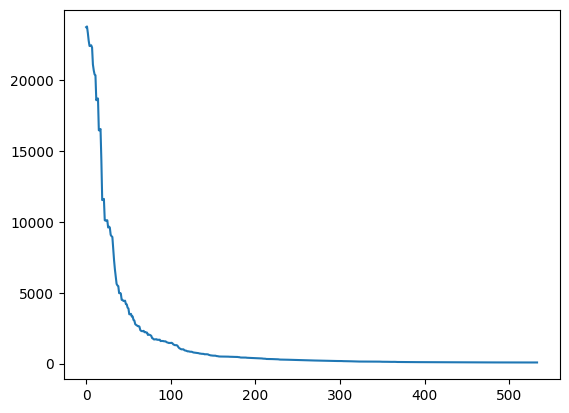

In [224]:
plt.plot(stochastic_gradient_descent(X=X, y=y, w=w.T, random_state=5)[1])

**Выведите вектор весов, к которому сошелся метод.**

In [225]:
stochastic_gradient_descent(X=X, y=y, w=w.T, random_state=5)[0]

array([[41.82293218,  3.14740313, 62.06281795, -6.94929534]])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [226]:
stochastic_gradient_descent(X=X, y=y, w=w.T, random_state=5)[1][-1]

78.12474982261567